# 1.5 Data Sets

## Housing Data Set

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], 
                         columns=boston['feature_names'])
boston_df['label'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Game Purchases

In [4]:
games_df = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
games_df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


## Big Query

In [5]:
from google.cloud import bigquery

In [6]:
client = bigquery.Client()

sql = """
  SELECT * 
  FROM  `bigquery-public-data.samples.natality`
  limit 10
"""

natality_df = client.query(sql).to_dataframe()
natality_df.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,1970,1970,11,18,None,HI,False,7,8.000575,NaN,...,None,None,None,5,0,2,8,7,47,2
1,1973,1973,1,5,None,HI,False,4,6.750554,1.0,...,None,None,None,3,0,5,9,4,37,2
2,1979,1979,7,27,None,HI,False,6,5.562263,1.0,...,None,None,None,5,2,1,9,6,36,1
3,1980,1980,3,18,None,HI,True,4,7.098885,1.0,...,None,None,None,7,0,2,10,4,44,1
4,1982,1982,4,30,None,ID,True,5,6.124442,1.0,...,None,None,None,7,1,0,9,5,38,1


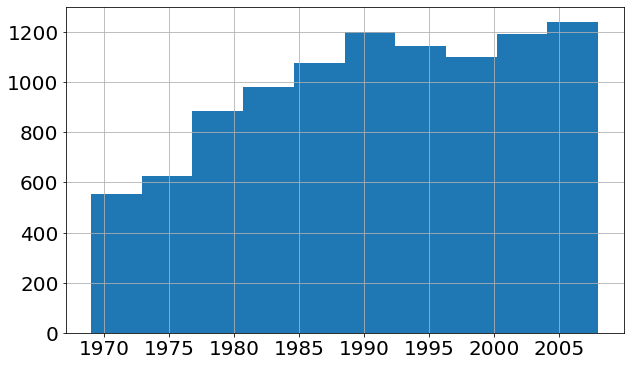

In [7]:
natality_df = client.query("""
  SELECT year
  FROM  `bigquery-public-data.samples.natality`
  order by rand()
  limit 10000
""").to_dataframe()

natality_df['year'].hist(figsize=(10, 6), ylabelsize=20, xlabelsize=20)

## Kaggle 

In [5]:
import pandas as pd

In [6]:
nhl_df = pd.read_csv('../data/nhl-game-data/game.csv') 
nhl_df.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


# 1.6 Prototype Models

## Linear Regression

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, r2_score

# load Boston housing data set 
boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], 
                         columns=boston['feature_names'])
boston_df['label'] = boston['target']

# create train and test splits of the housing data set 
x_train, x_test, y_train, y_test = train_test_split(
    boston_df.drop(['label'], axis=1), 
    boston_df['label'], 
    test_size=0.33,
    random_state=42
)

# train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# print results 
y_pred = model.predict(x_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

R^2 Score: 0.7261570836552493
Mean Absolute Error: 3.148255754816813


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd

games_df = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")

# create train and test splits of the game data set 
x_train, x_test, y_train, y_test = train_test_split(
    games_df.drop(['label'], axis=1), 
    games_df['label'], 
    test_size=0.33,
    random_state=42,
    stratify=games_df['label']
)

# train a linear regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# print results
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

Accuracy Score: 0.8726021960576796
ROC AUC Score: 0.760328131292699


## Keras Regression

In [10]:
# !pip install --user tensorflow-cpu

In [11]:
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
tf.__version__, K.__version__

('2.2.0', '2.3.0-tf')

In [15]:
# create train and test splits of the game data set 
x_train_val, x_test, y_train_val, y_test = train_test_split(
    games_df.drop(['label'], axis=1), 
    games_df['label'], 
    test_size=0.33,
    random_state=42,
    stratify=games_df['label']
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, 
    y_train_val, 
    test_size=0.2,
    random_state=42,
    stratify=y_train_val
)

# define the network strcuture 
model = K.models.Sequential()
model.add(K.layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(K.layers.Dropout(0.1))
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dropout(0.1))
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dense(1, activation='sigmoid'))
    
# compile and fit the model    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[K.metrics.AUC(name='auc')])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=100, verbose=0)

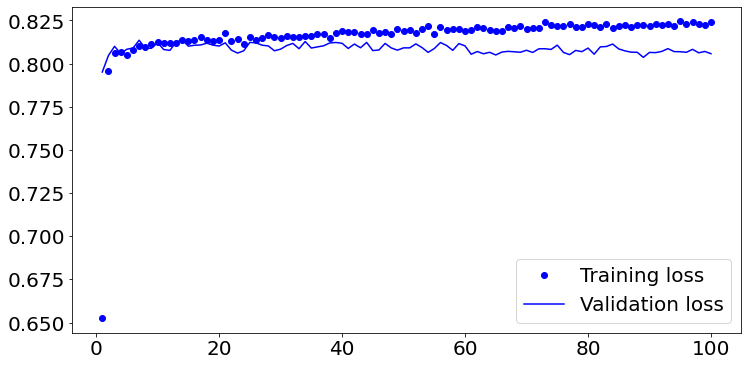

In [16]:
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 20})
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
print(f"ROC AUC Score: {results['auc']}")

ROC AUC Score: 0.8139095902442932


# 1.7 Feature Engineering

In [1]:
import pathlib

In [2]:
import pandas as pd
import featuretools as ft
import framequery as fq

In [3]:
PROJECT_DIR = pathlib.Path('~/ds-production').expanduser()
DATA_DIR = PROJECT_DIR / 'data'
NHL_DATA_DIR = DATA_DIR / 'nhl-game-data'

In [4]:
def get_plays_df():
    plays_df = (
        pd.read_csv(
            filepath_or_buffer=NHL_DATA_DIR / "game_plays.csv",
            usecols=lambda col: col not in {'secondaryType', 
                                            'periodType', 
                                            'dateTime', 
                                            'rink_side'},
            dtype={'game_id': 'Int32',
                   'play_num': 'Int16',
                   'team_id_for': 'Int8',
                   'team_id_against': 'Int8',
                   'event': 'category',
                   'x': 'Int8',
                   'y': 'Int8',
                   'period': 'Int8',
                   'periodTime': 'Int16',
                   'periodTimeRemaining': 'Int16',
                   'goals_away': 'Int8',
                   'goals_home': 'Int8',
                   'description': 'category',
                   'st_x': 'Int8',
                   'st_y': 'Int8'}
        )
        .fillna(value={'team_id_for': 0, 
                       'team_id_against': 0, 
                       'x': 0, 'y': 0, 
                       'st_x': 0, 'st_y': 0})
    )
    return plays_df

In [5]:
game_df = pd.read_csv(NHL_DATA_DIR / "game.csv")
plays_df = get_plays_df()

In [6]:
es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(
    entity_id="plays", 
    dataframe=plays_df, 
    index="play_id",
    variable_types={"event": ft.variable_types.Categorical, 
                    "description": ft.variable_types.Categorical}
)

f1 = ft.Feature(es["plays"]["event"])
f2 = ft.Feature(es["plays"]["description"])

encoded, defs = ft.encode_features(plays_df, [f1, f2], top_n=10)
encoded.reset_index(inplace=True)
encoded.head()

,index,event = Faceoff,event = Shot,event = Hit,event = Stoppage,event = Blocked Shot,event = Missed Shot,event = Giveaway,event = Takeaway,event = Penalty,...,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1200,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1200,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1200,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1200,0,0,0,0
4,4,0,0,0,0,0,0,1,0,0,...,1,28,24,1,21,1179,0,0,-28,-24


In [7]:
es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays", dataframe=encoded, index="play_id")
es = es.normalize_entity(base_entity_id="plays", new_entity_id="games", index="game_id")

features, transform = ft.dfs(entityset=es, target_entity="games", max_depth=2)
features.reset_index(inplace=True)
features.head()

,game_id,SUM(plays.event = Stoppage),SUM(plays.description = Puck in Benches),SUM(plays.event = Hit),SUM(plays.description = Puck in Netting),SUM(plays.x),SUM(plays.event = Giveaway),SUM(plays.event = Missed Shot),SUM(plays.description = Period Official),SUM(plays.description = Puck in Crowd),...,MEAN(plays.goals_away),MEAN(plays.event = Faceoff),MEAN(plays.st_y),MEAN(plays.play_num),MEAN(plays.event = Goal),MEAN(plays.event is unknown),MEAN(plays.team_id_against),MEAN(plays.period),MEAN(plays.periodTimeRemaining),COUNT(plays)
0,2011030221,52,4,58,2,812,19,26,4,7,...,1.731638,0.194915,-0.884181,177.5,0.019774,0.050847,1.920904,2.251412,648.437853,354
1,2011030111,54,2,74,5,379,11,28,3,1,...,0.221607,0.185596,1.279778,181.0,0.016620,0.038781,4.911357,2.016620,627.905817,361
2,2011030222,38,4,56,2,-2141,17,17,3,2,...,0.583333,0.169872,1.262821,156.5,0.016026,0.044872,2.169872,1.996795,613.660256,312
3,2011030223,49,4,58,6,3540,13,19,4,5,...,1.871875,0.203125,-0.268750,160.5,0.021875,0.056250,2.084375,2.350000,633.118750,320
4,2011030224,50,7,42,6,405,25,16,3,1,...,1.596091,0.208469,-1.970684,154.0,0.019544,0.045603,1.895765,1.951140,575.260586,307


In [8]:
# assign labels to the generated features
features = fq.execute("""
  SELECT 
      F.*, 
      CASE WHEN G.type = 'P' THEN 1 ELSE 0 END AS label
  FROM features F 
  JOIN game_df G
      ON F.game_id = G.game_id
""")

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# create inputs for sklearn
X = features.drop(['label', 'game_id'], axis=1).fillna(0)
y = features['label']

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# train a classifier 
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

# Results
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

Accuracy Score: 0.948421520675856
ROC AUC Score: 0.9345276515935746
